VERİ GÖRSELLEŞTİRME VE KARŞILAŞTIRMALI ANALİZ

1-AMAÇ

Bu notebook’ta enerji tüketim ve tahsilat verileri kullanılarak, müşteri davranışlarının, bölgesel farklılıkların ve ödeme alışkanlıklarının
görsel analiz yoluyla incelenmesi amaçlanmaktadır. Veri görselleştirme teknikleri kullanılarak sayısal bulguların daha anlaşılır,
yorumlanabilir hale getirmektir

2-KÜTÜPHANELER

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
3-VERİ YÜKLEME

In [3]:
import os
print(os.getcwd())

C:\Users\ozden\casestudy


In [4]:
file_path = "elektrik_veri_hashed.xlsx"
xls = pd.ExcelFile(file_path)
xls.sheet_names

['Tahsilat', 'Tahsilat 1', 'Tahakkuk', 'Tahakkuk 1', 'Tahakkuk 2']

In [5]:
df_tahsilat = pd.read_excel(xls, sheet_name="Tahsilat")
df_tahsilat1 = pd.read_excel(xls, sheet_name="Tahsilat 1")
df_hamamozu = pd.read_excel(xls, sheet_name="Tahakkuk")
df_gumush = pd.read_excel(xls, sheet_name="Tahakkuk 1")
df_goynucek = pd.read_excel(xls, sheet_name="Tahakkuk 2")

4-HESAP SINIFLARI

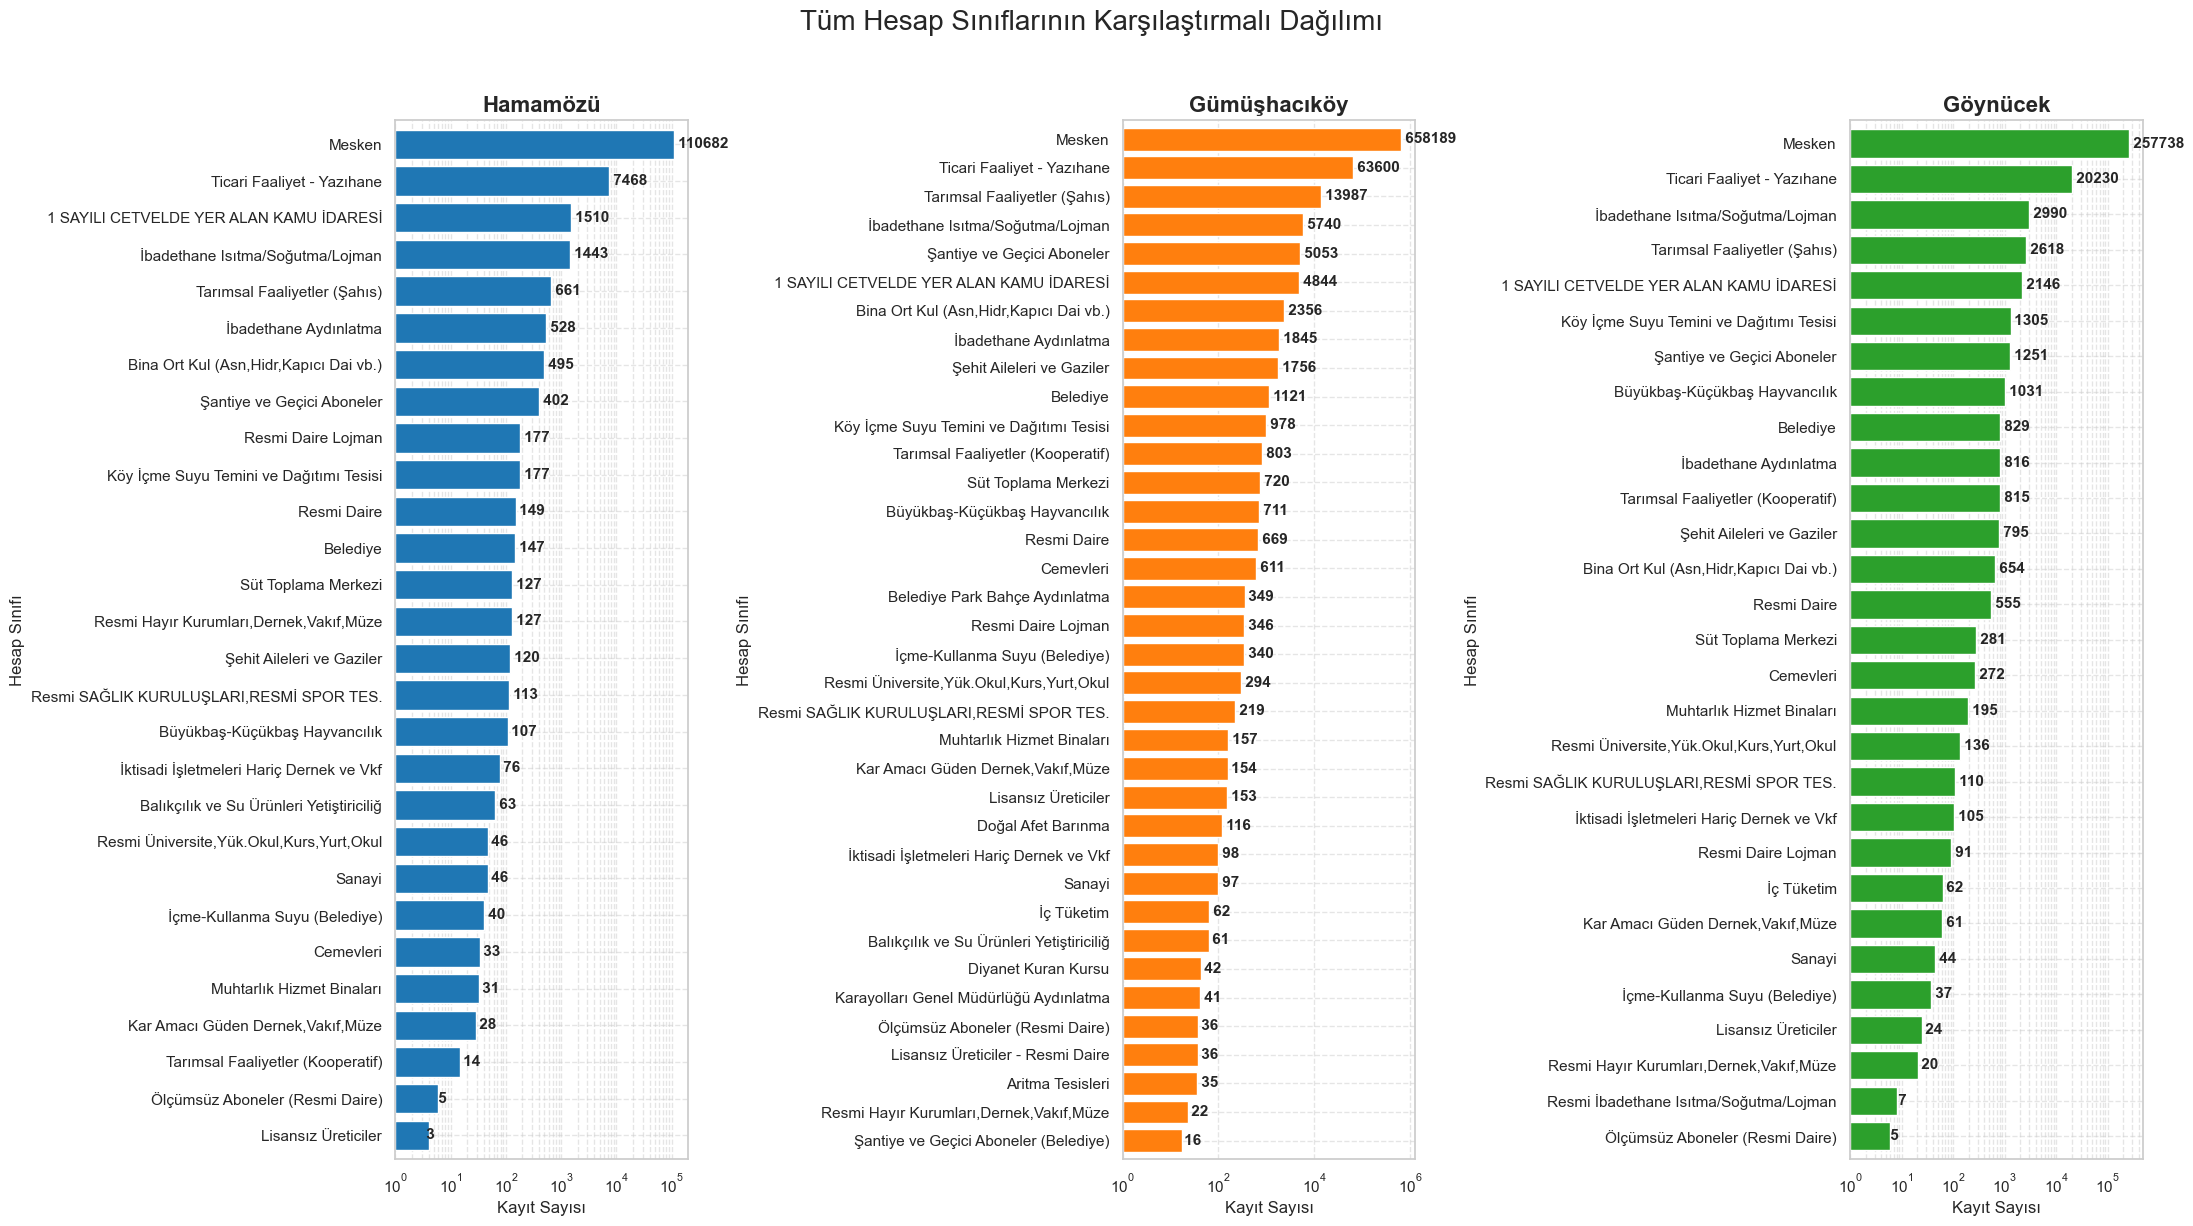

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(22, 12))
ilceler = [(df_hamamozu, "Hamamözü", 0), 
           (df_gumush, "Gümüşhacıköy", 1), 
           (df_goynucek, "Göynücek", 2)]
for dataframe, isim, index in ilceler:
    counts = dataframe["Hesap Sınıfı"].value_counts().sort_values()
    counts.plot(kind="barh", ax=axes[index], color=plt.cm.tab10(index), log=True, width=0.8)
    for i, v in enumerate(counts):
        axes[index].text(v, i, f' {int(v)}', va='center', fontweight='bold', fontsize=11)
    
    axes[index].set_title(isim, fontsize=16, fontweight='bold')
    axes[index].set_xlabel("Kayıt Sayısı")
    axes[index].grid(True, which="both", ls="--", alpha=0.5)

plt.suptitle("Tüm Hesap Sınıflarının Karşılaştırmalı Dağılımı", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

5-İLÇELERE GÖRE SEKTÖREL FAALİYET YOĞUNLUĞU

In [20]:
ilce_dataframes = {
    "Hamamözü": df_hamamozu,
    "Gümüşhacıköy": df_gumush,
    "Göynücek": df_goynucek
}

print("İlçe Bazlı Sektörel Oranlar (%):\n" + "-"*30)

for isim, dataframe in ilce_dataframes.items():
    oranlar = dataframe["Hesap Sınıfı"].value_counts(normalize=True) * 100
    
    print(f"\n[{isim.upper()}]")
    
    # Ticari tespit (İçinde 'Ticari' veya 'Sanayi' geçenleri topla)
    ticari_oran = oranlar[oranlar.index.str.contains('Ticari|Sanayi|İşyeri', case=False, na=False)].sum()
    
    # Tarımsal tespit (İçinde 'Tarım' veya 'Sulama' geçenleri topla)
    tarim_oran = oranlar[oranlar.index.str.contains('Tarım|Sulama|Hayvan', case=False, na=False)].sum()
    
    print(f"Ticari Faaliyet Oranı: %{ticari_oran:.2f}")
    print(f"Tarımsal Faaliyet Oranı: %{tarim_oran:.2f}")

İlçe Bazlı Sektörel Oranlar (%):
------------------------------

[HAMAMÖZÜ]
Ticari Faaliyet Oranı: %6.02
Tarımsal Faaliyet Oranı: %0.63

[GÜMÜŞHACIKÖY]
Ticari Faaliyet Oranı: %8.32
Tarımsal Faaliyet Oranı: %2.02

[GÖYNÜCEK]
Ticari Faaliyet Oranı: %6.87
Tarımsal Faaliyet Oranı: %1.51


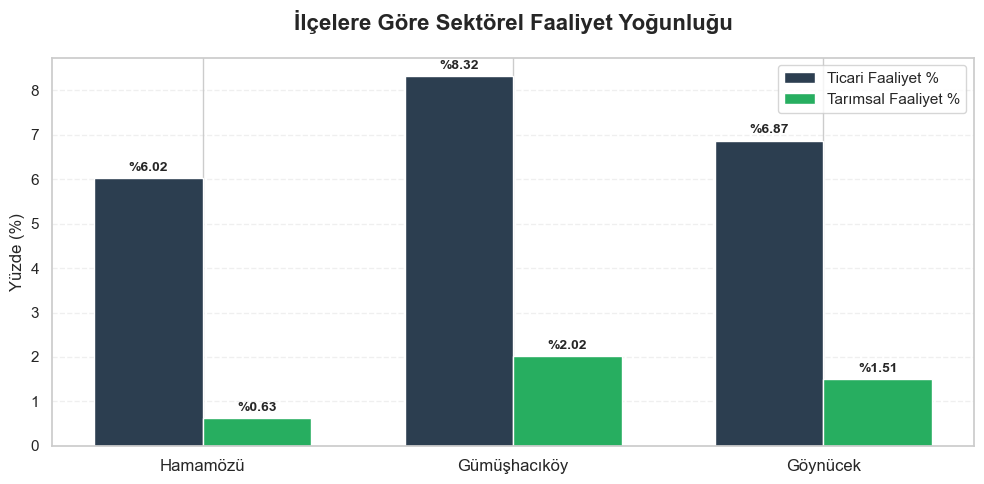

In [22]:
veriler = {'İlçe': ['Hamamözü', 'Gümüşhacıköy', 'Göynücek'],
    'Ticari': [6.02, 8.32, 6.87],
    'Tarımsal': [0.63, 2.02, 1.51]}
df_oranlar = pd.DataFrame(veriler)
x = np.arange(len(df_oranlar['İlçe']))  
width = 0.35  # Çubuk genişliği

fig, ax = plt.subplots(figsize=(10, 5))


rects1 = ax.bar(x - width/2, df_oranlar['Ticari'], width, label='Ticari Faaliyet %', color='#2c3e50')
rects2 = ax.bar(x + width/2, df_oranlar['Tarımsal'], width, label='Tarımsal Faaliyet %', color='#27ae60')


ax.set_ylabel('Yüzde (%)', fontsize=12)
ax.set_title('İlçelere Göre Sektörel Faaliyet Yoğunluğu', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(df_oranlar['İlçe'], fontsize=12)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'%{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

autolabel(rects1)
autolabel(rects2)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

6-İLÇELER ARASI ORTALAMA ELEKTRİK TÜKETİMİ

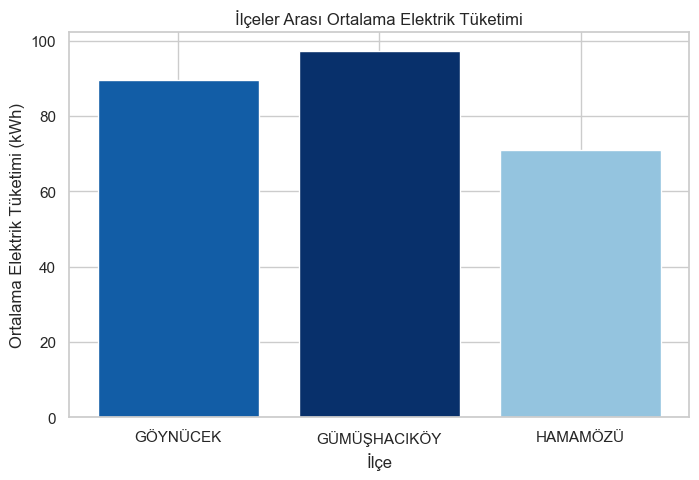

In [37]:
values = ilce_ortalama["kwh"]

# Normalize
norm = plt.Normalize(values.min(), values.max())

# Renk aralığını daralt (0.4 – 1.0)
colors = plt.cm.Blues(0.4 + 0.6 * norm(values))

plt.figure(figsize=(8, 5))
plt.bar(
    ilce_ortalama["ilce"],
    ilce_ortalama["kwh"],
    color=colors
)

plt.xlabel("İlçe")
plt.ylabel("Ortalama Elektrik Tüketimi (kWh)")
plt.title("İlçeler Arası Ortalama Elektrik Tüketimi")
plt.show()


İlçelere Göre Sektörel Faaliyet Yoğunluğu grafiği incelendiğinde Gümüşhacıköy Ticarive tarımsal faliyet bakımından ön sırada gelmektedir.

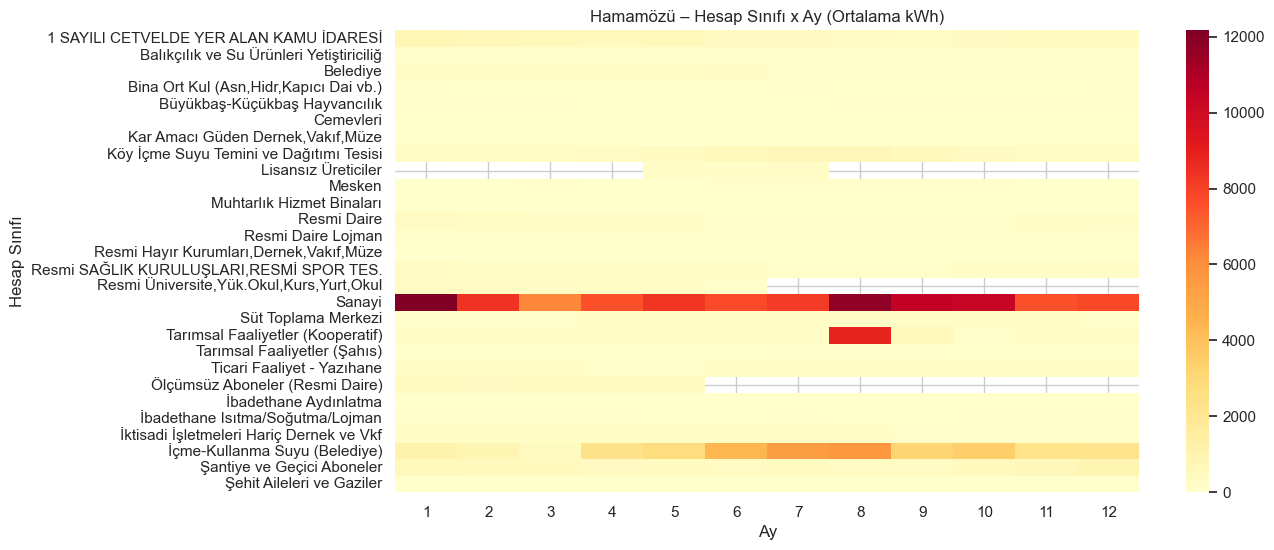

In [25]:
import matplotlib.pyplot as plt
df_hamamozu["mali_yil_donem"] = pd.to_datetime(df_hamamozu["mali_yil_donem"])
df_hamamozu["ay"] = df_hamamozu["mali_yil_donem"].dt.month

pivot_hamamozu = pd.pivot_table(
    df_hamamozu,
    values="kwh",
    index="Hesap Sınıfı",
    columns="ay",
    aggfunc="mean"
)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_hamamozu, cmap="YlOrRd")
plt.title("Hamamözü – Hesap Sınıfı x Ay (Ortalama kWh)")
plt.xlabel("Ay")
plt.ylabel("Hesap Sınıfı")
plt.show()


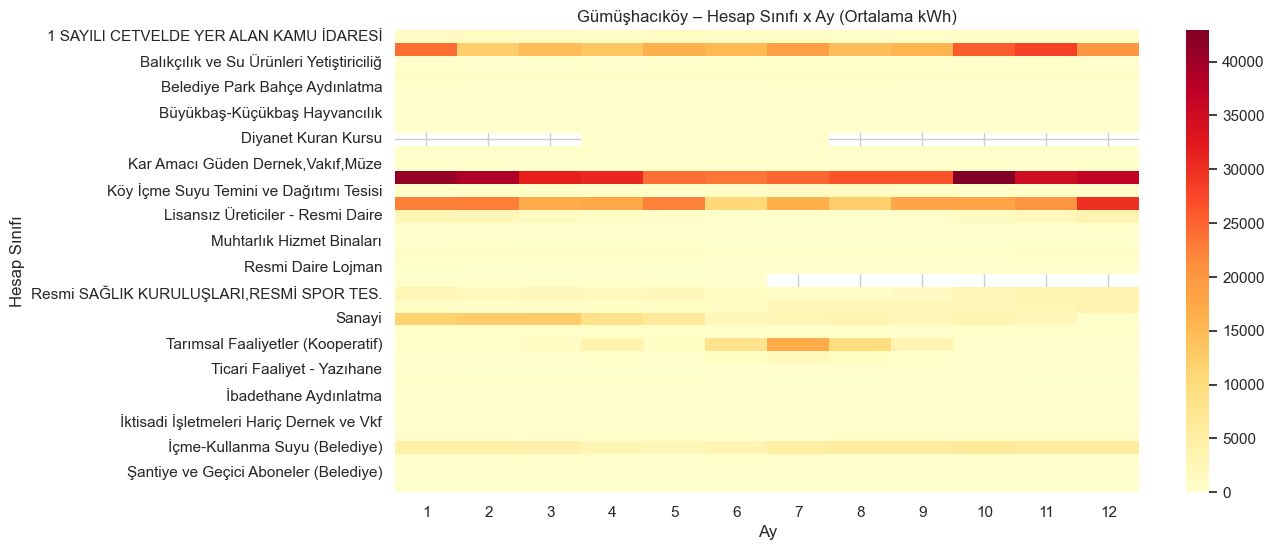

In [26]:
df_gumush["mali_yil_donem"] = pd.to_datetime(df_gumush["mali_yil_donem"])
df_gumush["ay"] = df_gumush["mali_yil_donem"].dt.month

pivot_gumush = pd.pivot_table(
    df_gumush,
    values="kwh",
    index="Hesap Sınıfı",
    columns="ay",
    aggfunc="mean"
)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_gumush, cmap="YlOrRd")
plt.title("Gümüşhacıköy – Hesap Sınıfı x Ay (Ortalama kWh)")
plt.xlabel("Ay")
plt.ylabel("Hesap Sınıfı")
plt.show()


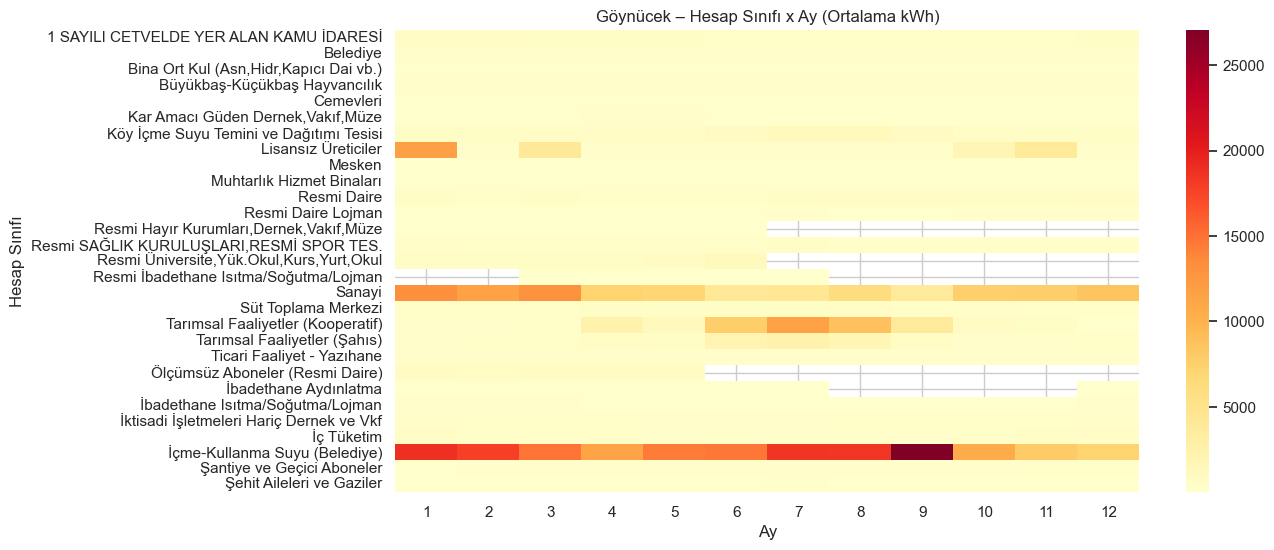

In [27]:
df_goynucek["mali_yil_donem"] = pd.to_datetime(df_goynucek["mali_yil_donem"])
df_goynucek["ay"] = df_goynucek["mali_yil_donem"].dt.month

pivot_goynucek = pd.pivot_table(
    df_goynucek,
    values="kwh",
    index="Hesap Sınıfı",
    columns="ay",
    aggfunc="mean"
)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_goynucek, cmap="YlOrRd")
plt.title("Göynücek – Hesap Sınıfı x Ay (Ortalama kWh)")
plt.xlabel("Ay")
plt.ylabel("Hesap Sınıfı")
plt.show()


Isı haritası, hesap sınıflarının aylara göre ortalama tüketim davranışlarını açıkça göstermektedir. Ticari ve tarımsal hesap sınıflarında yaz aylarında belirgin tüketim artışı gözlemlenirken,mesken abonelerinde daha dengeli bir tüketim profili bulunmaktadır.


In [29]:
df_all = pd.concat([df_hamamozu, df_gumush, df_goynucek], ignore_index=True)
df_all["mali_yil_donem"] = pd.to_datetime(df_all["mali_yil_donem"])
df_all["ay"] = df_all["mali_yil_donem"].dt.month


In [30]:
aylik_ortalama = (
    df_all
    .groupby(["ilce", "ay"])["kwh"]
    .mean()
    .reset_index()
)

7-AYLIK ORTALAMA TÜKETİM – İLÇE BAZLI MEVSİMSEL TREND

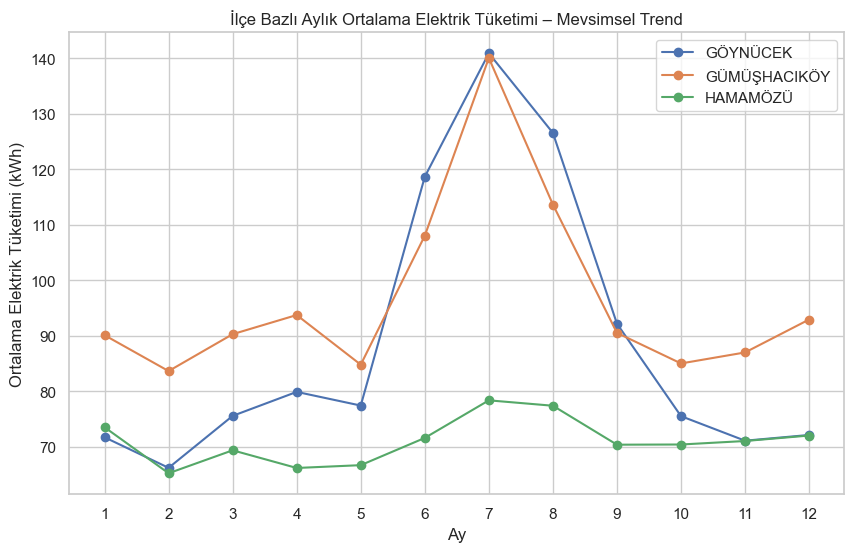

In [31]:
plt.figure(figsize=(10, 6))

for ilce in aylik_ortalama["ilce"].unique():
    subset = aylik_ortalama[aylik_ortalama["ilce"] == ilce]
    plt.plot(subset["ay"], subset["kwh"], marker="o", label=ilce)

plt.xlabel("Ay")
plt.ylabel("Ortalama Elektrik Tüketimi (kWh)")
plt.title("İlçe Bazlı Aylık Ortalama Elektrik Tüketimi – Mevsimsel Trend")
plt.xticks(range(1, 13))
plt.legend()
plt.show()

Aylık ortalama tüketim değerleri incelendiğinde tüm ilçelerde yaz aylarında (Haziran–Ağustos) belirgin bir tüketim artışı gözlemlenmektedir.
Bu artış Gümüşhacıköy ilçesinde daha yüksek seviyelerde gerçekleşirken, Hamamözü ilçesinde tüketim daha düşük ve dengeli seyretmektedir. Bu artışın nedeni hayvancılık ve tarım hizmetinden dolayı sulama olabiir

8-TAHSİLAT SAYFASINDAKİ İLÇE VE ŞUBE DAĞILIMLARINI

In [51]:
df_tahsilat = pd.read_excel(xls, sheet_name="Tahsilat")
df_tahsilat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636993 entries, 0 to 636992
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Şube                   636993 non-null  object        
 1   Kasa                   636993 non-null  object        
 2   İlçe                   636993 non-null  object        
 3   Söz.hsp.(bağımsız)     636993 non-null  int64         
 4   Tahsilat Tarihi        636993 non-null  datetime64[ns]
 5   Nakit Tahsilat         523 non-null     float64       
 6   Mahsuben Tahsilat      7542 non-null    float64       
 7   Kredi Kartı Tahsilatı  0 non-null       float64       
 8   Banka Tahsilatı        628933 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 43.7+ MB


In [57]:
df_tahsilat.head()

,Şube,Kasa,İlçe,Söz.hsp.(bağımsız),Tahsilat Tarihi,Nakit Tahsilat,Mahsuben Tahsilat,Kredi Kartı Tahsilatı,Banka Tahsilatı
0,Tayin edilmedi,Tayin edilmedi,TAŞOVA,4989745446,2023-11-06,NaN,8648.95,NaN,0.0
1,Tayin edilmedi,Tayin edilmedi,TAŞOVA,4989745446,2024-06-26,NaN,762.40,NaN,0.0
2,Tayin edilmedi,Tayin edilmedi,TAŞOVA,4989745446,2024-07-10,NaN,311.60,NaN,0.0
3,PTT,PTT/PV,TAŞOVA,4254955886,2023-01-19,NaN,NaN,NaN,130.5
4,PTT,PTT/PV,TAŞOVA,4254955886,2023-02-17,NaN,NaN,NaN,117.0


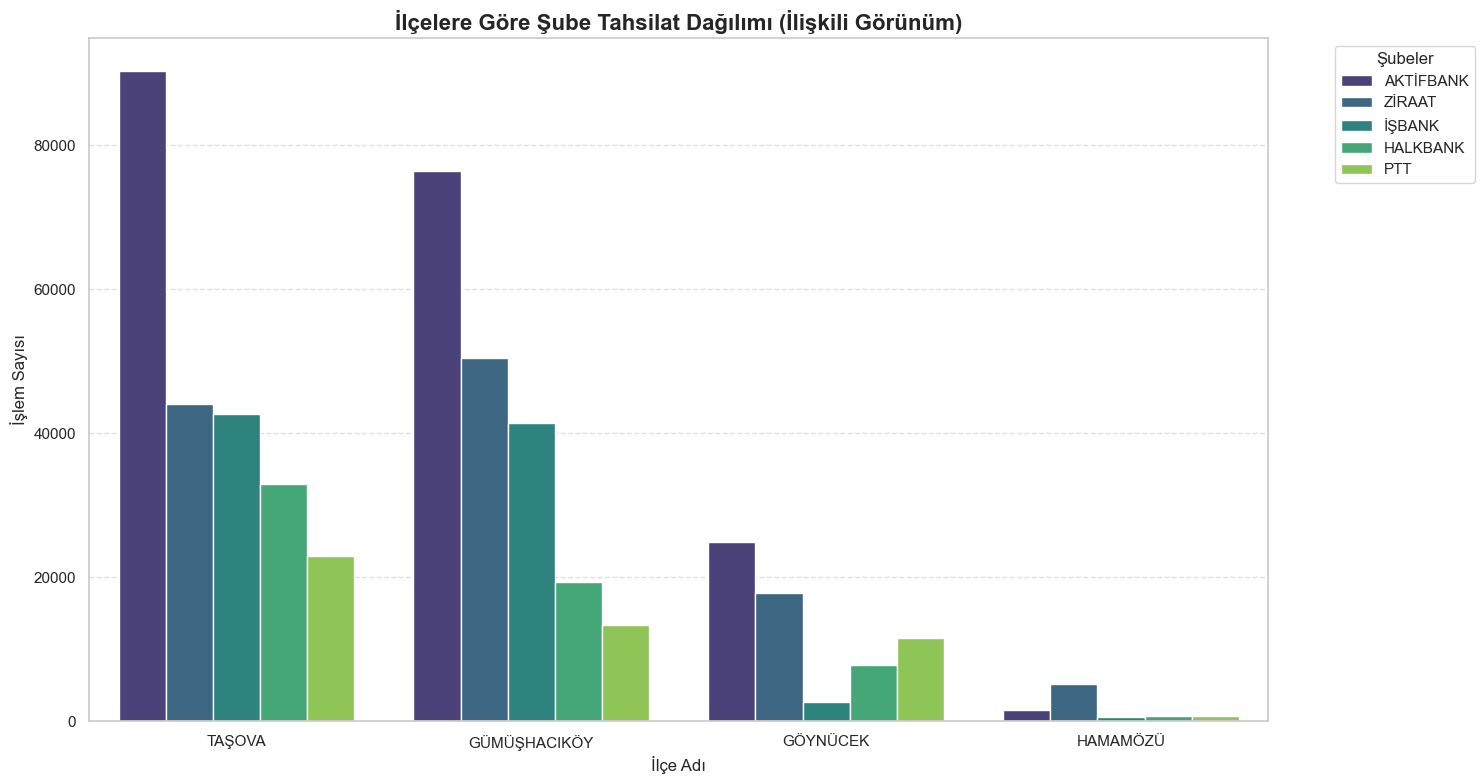

In [56]:
top_ilceler = df_tahsilat['İlçe'].value_counts().nlargest(5).index
df_plot = df_tahsilat[df_tahsilat['İlçe'].isin(top_ilceler)]

plt.figure(figsize=(15, 8))

sns.countplot(data=df_plot, x='İlçe', hue='Şube', 
              palette='viridis', 
              order=top_ilceler,
              hue_order=df_plot['Şube'].value_counts().nlargest(5).index)

plt.title('İlçelere Göre Şube Tahsilat Dağılımı (İlişkili Görünüm)', fontsize=16, fontweight='bold')
plt.xlabel('İlçe Adı', fontsize=12)
plt.ylabel('İşlem Sayısı', fontsize=12)
plt.legend(title='Şubeler', bbox_to_anchor=(1.05, 1), loc='upper left') # Lejantı dışarı alalım
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Taşova,Gümüşhacıköy ve Göynücek gibi ilçelerde tahsilatın büyük kısmı bankalar üzerinden yapılmaktadır.

In [60]:
df_tahsilat1 = pd.read_excel(xls, sheet_name="Tahsilat 1")
df_tahsilat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917632 entries, 0 to 917631
Data columns (total 22 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Mali yıl/dönem                        917632 non-null  object 
 1   İl                                    917632 non-null  object 
 2   İlçe                                  917632 non-null  object 
 3   Söz.hsp.(bağımsız)                    917632 non-null  int64  
 4   Hesap Sınıfı                          917632 non-null  object 
 5   Tahakkuk Tutar                        917632 non-null  float64
 6   Son Ödeme Tarihinden Önceki Tahsilat  623908 non-null  float64
 7   Son Ödeme Tarihindeki Tahsilat        328193 non-null  float64
 8   Son Ödeme (1)                         20902 non-null   float64
 9   Son Ödeme (2)                         21664 non-null   float64
 10  Son Ödeme (3)                         18893 non-null   float64
 11  

9-TAHSİLAT 1 VERİSİNDEN ZAMANINDA VE GEÇ ÖDEME ORANLARI

In [61]:
# Zamanında ödeme tutarı
zamaninda_odeme = (
    df_tahsilat1["Son Ödeme Tarihinden Önceki Tahsilat"].fillna(0).sum()
    + df_tahsilat1["Son Ödeme Tarihindeki Tahsilat"].fillna(0).sum()
)

# Geç ödeme sütunları
gec_odeme_sutunlari = [
    "Son Ödeme (1)", "Son Ödeme (2)", "Son Ödeme (3)", "Son Ödeme (4)",
    "Son Ödeme (5)", "Son Ödeme (6-10)", "Son Ödeme (10-20)",
    "Son Ödeme (20-30)", "Son Ödeme (30-60)", "Son Ödeme (60-90)",
    "Son Ödeme (90-120)", "Son Ödeme (120-150)",
    "Son Ödeme (150-180)", "Son Ödeme (180+)"
]

gec_odeme = df_tahsilat1[gec_odeme_sutunlari].fillna(0).sum().sum()

zamaninda_odeme, gec_odeme

(308328467.85999995, 157984135.14)

In [62]:
toplam = zamaninda_odeme + gec_odeme
zamaninda_oran = zamaninda_odeme / toplam * 100
gec_oran = gec_odeme / toplam * 100
zamaninda_oran, gec_oran


(66.12055215243667, 33.87944784756332)

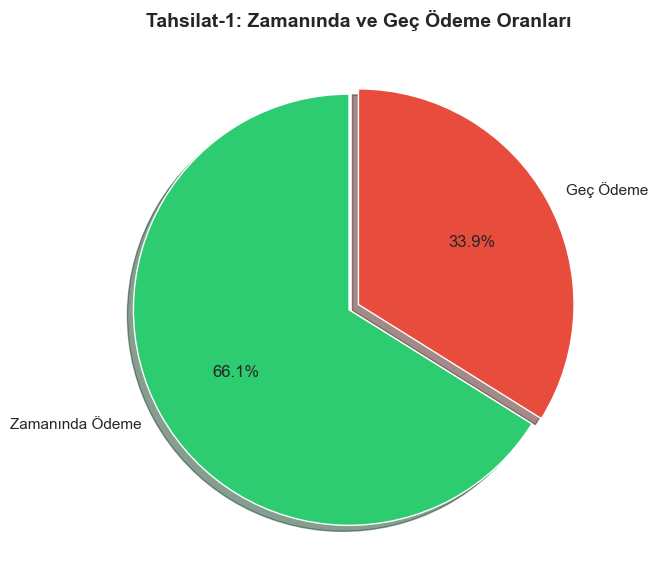

In [64]:
import matplotlib.pyplot as plt

labels = ["Zamanında Ödeme", "Geç Ödeme"]
sizes = [zamaninda_oran, gec_oran]
colors = ["#2ecc71", "#e74c3c"]  

plt.figure(figsize=(7, 7))
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    explode=(0.05, 0),  
    shadow=True
)

plt.title(
    "Tahsilat-1: Zamanında ve Geç Ödeme Oranları",
    fontsize=14,
    fontweight="bold"
)

plt.show()


In [65]:
def iqr_outlier_limits(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper


C:\Users\ozden\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ozden\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ozden\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


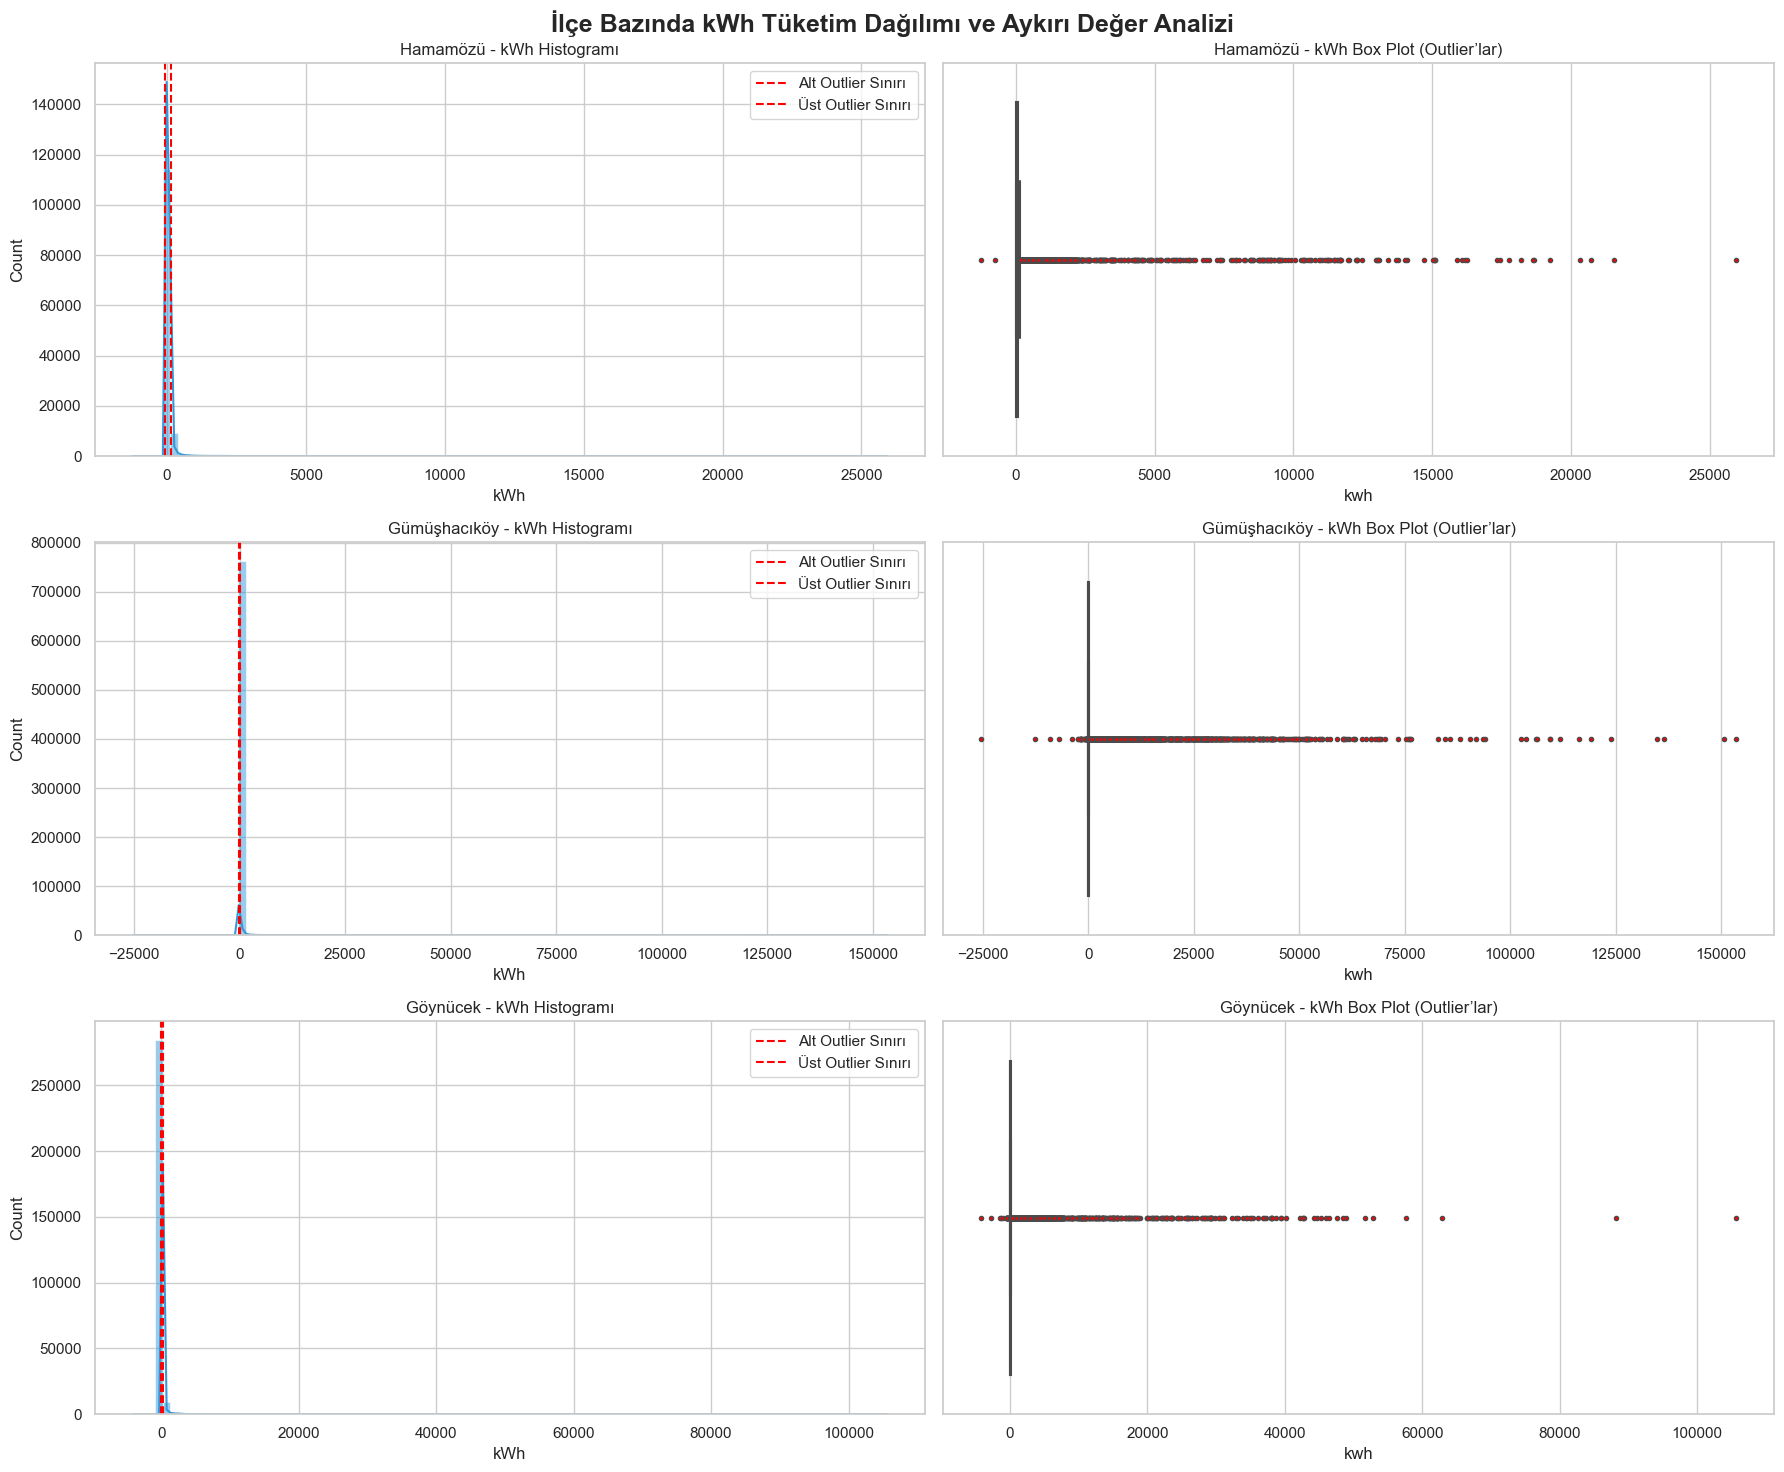

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

datasets = {
    "Hamamözü": df_hamamozu["kwh"],
    "Gümüşhacıköy": df_gumush["kwh"],
    "Göynücek": df_goynucek["kwh"]
}

fig, axes = plt.subplots(3, 2, figsize=(18, 15))

for i, (ilce, data) in enumerate(datasets.items()):
    

    lower, upper = iqr_outlier_limits(data)
    
   
    sns.histplot(
        data,
        bins=100,
        kde=True,
        ax=axes[i, 0],
        color="#3498db"
    )
    
    axes[i, 0].axvline(lower, color="red", linestyle="--", label="Alt Outlier Sınırı")
    axes[i, 0].axvline(upper, color="red", linestyle="--", label="Üst Outlier Sınırı")
    axes[i, 0].set_title(f"{ilce} - kWh Histogramı")
    axes[i, 0].set_xlabel("kWh")
    axes[i, 0].legend()
    
    
    sns.boxplot(
        x=data,
        ax=axes[i, 1],
        color="#2ecc71",
        flierprops=dict(marker='o', markersize=3, markerfacecolor='red')
    )
    
    axes[i, 1].set_title(f"{ilce} - kWh Box Plot (Outlier’lar)")

plt.suptitle(
    "İlçe Bazında kWh Tüketim Dağılımı ve Aykırı Değer Analizi",
    fontsize=18,
    fontweight="bold"
)

plt.tight_layout()
plt.show()


10-SONUÇ

Bu notebook kapsamında enerji tüketim ve tahsilat verileri kullanılarakilçe bazlı müşteri davranışları, tüketim alışkanlıkları ve ödeme performansları
görsel analiz yöntemleriyle incelenmiştir.